# Outliers

### Discussion Related with outliers and impact on machine learning

Records that are significantly different from other records, which deviates so much from the other observation which can arise some suspicion that is outliers

#### Which machine learning models are sensitive to outliers?
1. Naivye Bayes Classifier--- Not Sensitive
2. SVM ---------------------- Not Sensitive
3. Linear Regression -------- Sensitive to outliers
4. Logistic Regression ------ Sensitive to outliers
5. Decision Tree Regressor or Classifier -------------------- Not Sensitive
6. Ensemble(Random forest, XGboost, Gradient boosting) ------ Not Sensitive
7. KNN ---------------------- Not Sensitive
8. Kmean--------------------- Sensitive
9. Hierarchal --------------- Sensitive
10. PCA --------------------- Sensitive
11. Neural Network ---------- Sensitive
12. DBScan ------------------ Sensitive

In [38]:
import pandas as pd

df=pd.read_csv('Titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.Age.isnull().sum()

177

C:\Users\BRAGADEESH\anaconda3\envs\featurengineering\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

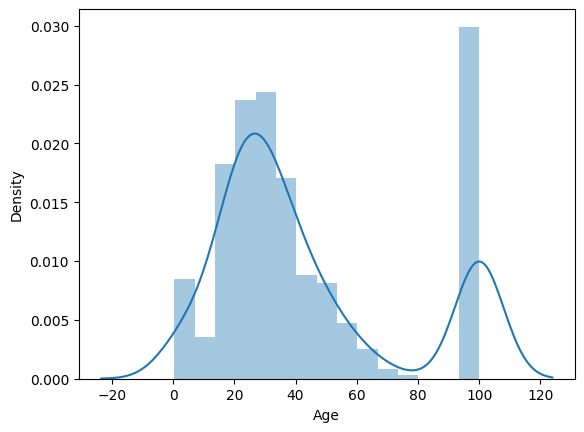

In [5]:
import seaborn as sns

sns.distplot(df['Age'].fillna(100))

### feature is Gausian Distributed

Text(0, 0.5, 'No of Passengers')

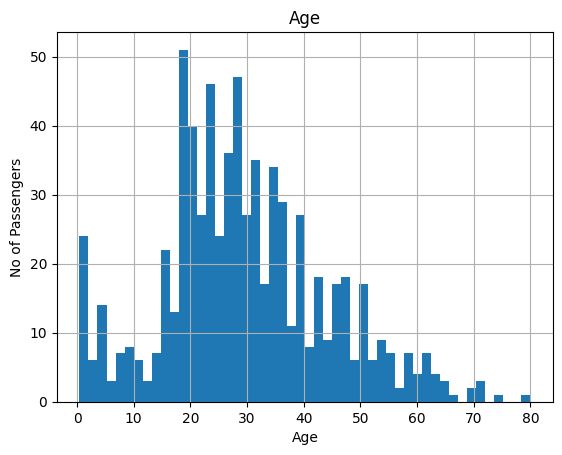

In [7]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passengers')

C:\Users\BRAGADEESH\anaconda3\envs\featurengineering\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

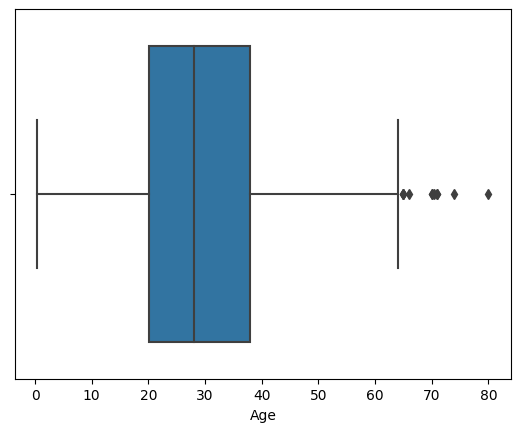

In [8]:
# for finding outlier
# boxplot

sns.boxplot(df['Age'])

In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
##### Assuming age follows Gausian Distribution we will calculate the boundaries which differentiates the outliers

In [16]:
upperboundary=df['Age'].mean()+3* df['Age'].std()
lowerboundary=df['Age'].mean()-3* df['Age'].std()
print(lowerboundary), print(upperboundary), print(df["Age"].mean())

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

### feature is Skewed

Text(0, 0.5, 'No of Passengers')

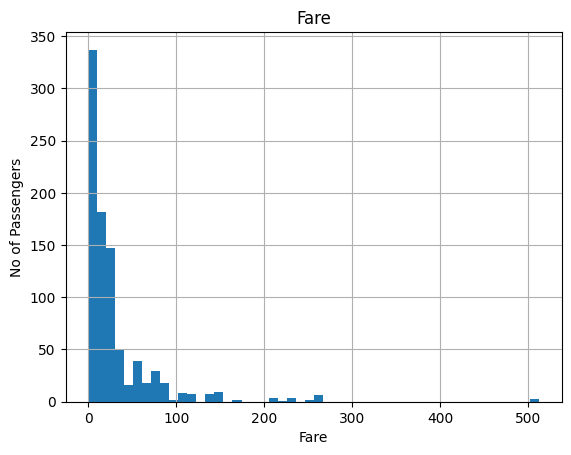

In [22]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passengers')

C:\Users\BRAGADEESH\anaconda3\envs\featurengineering\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

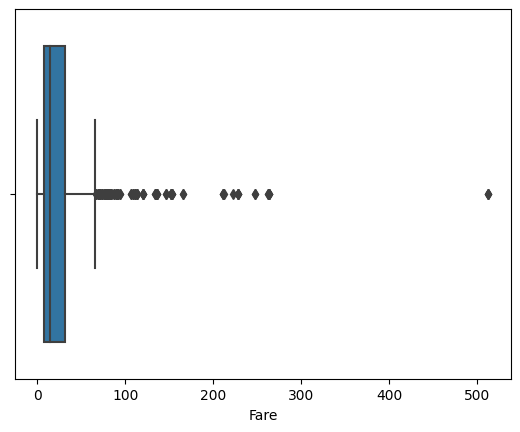

In [23]:
# for finding outlier
# boxplot

sns.boxplot(df['Fare'])

In [24]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [26]:
### lets computer the Interquantile range to calculate the boundaries

IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [27]:
lower_bridge=df["Fare"].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

####### Whenever the data is skewed always take extreme outliers

In [29]:
lower_bridge=df["Fare"].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [30]:
## Removing values

In [48]:
data=df.copy()

In [49]:
data.loc[data['Age']>=73,'Age']=73

C:\Users\BRAGADEESH\anaconda3\envs\featurengineering\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

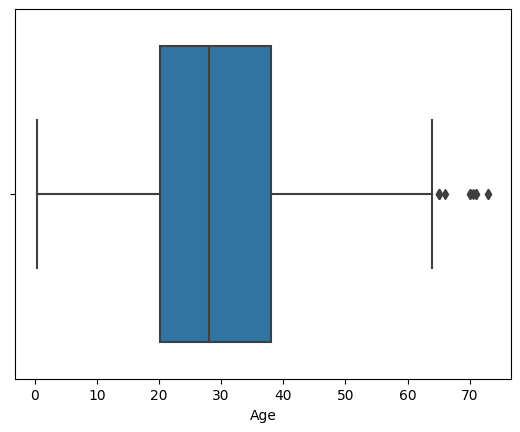

In [50]:
sns.boxplot(data['Age'])

In [51]:
data.loc[data['Fare']>=100,'Fare']=100

C:\Users\BRAGADEESH\anaconda3\envs\featurengineering\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

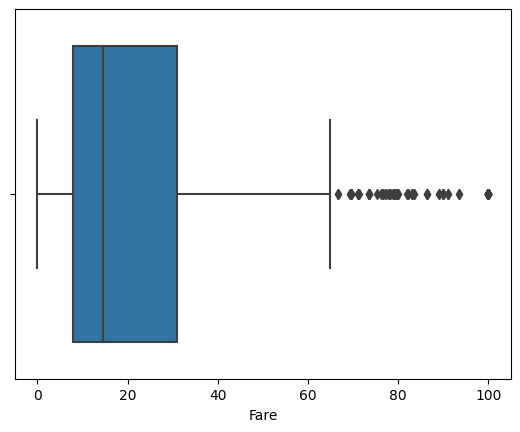

In [52]:
sns.boxplot(data['Fare'])

In [53]:
## Applying Algorithms

#### after removing outliers

In [69]:
### train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [70]:
### logistic regression
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()

classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score

print('Accuracy score:{}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score:{}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy score:0.6902985074626866
roc_auc_score:0.6823262207877593


In [71]:
from sklearn.metrics import accuracy_score,roc_auc_score